## 《天龙八部》的齐夫定律适用性分析

### 齐夫定律

- 定义  
 -  若热·穆南《语言学词典》  
 >“由齐夫所完成的统计语言学研究表明,一个词的刺激,符合它与其他词的关系处于统一素材之中。词是以使用频率来分类的,排列在第一的是使用频率最高的词。”
 
 - 哈特曼&斯托克《语言与语言学词典》  
>“齐夫定律是指关于谈话者或写作者使用的词的分布和频率的总描述：$f \times r = C$,其中，f为频率，r为词级，，即频率表上的位置之间由一个固定的比率。”

 - wiki
 >在自然语言的语料库里，一个单词出现的频率与它在频率表里的排名成反比.
齐夫定律表明了单词词频(f)和词级(r)的关系：
$f\propto \frac{1}{r}$ ；
即, 存在一个参数k使得：
$f \times r = k$



- 齐夫分布  
根据文献中出现的词频与等级序号的统计数据,建立与的直角坐标系,用横坐标表示词的等级序号,纵坐标表示相应的频次,我们就可以得到一条双曲线,即齐夫分布曲线。如果等级序号r与频次f都取对数坐标,
则上图中的图像就变成一条直线了,即齐夫分布对数曲线图一。这种类型的分布,就叫做齐夫分布。与之等价的数学表达式为：$\lg{r} + \lg{f} = \lg{c} $  
**注意:**这里f是频次。

- 发展历程  
  - J.Estuop  
  词的绝对频率（即频次）$n_r$与它相应的词的序号$r$的乘积大体上稳定于一个常数K,即,$n_r \cdot r = K$。
  - E.Condon  
  由Estoup公式提出了量化公式：$f_r = C \cdot r^{-1}$ 其中 $C = \frac{K}{N}，f_r 为频率$  
  横坐标表示词的序号的对数$\lg{r}$,纵坐标表示词的绝对频率的对数$\log{n_r}$,绘出了词频分布的图形。Condon发现,的分布关系接近于一条直线,而与横坐标轴的夹角为45°。
  - Zipf   
  确定了C为参数，论证了单参数词频分布公式$P_r(f_r) = Cr^{-1}$的的正确性。
  - M.Joos  
  双参数公式，$P_r(f_r) = Cr^{-b}$
  - B.Mandelbrot    
  三参数公式，$P_r(f_r) = C(r+a)^{-b}$    
  
 
  虽然从齐夫定律的发展史上来看,并不是齐夫首先提出词频分布公式,但由于其做了大量艰巨的数据统计和分析工作,首先验证了这个公式的可靠性,人们为了纪念他的贡献,就把公式$f \times r = C$命名为齐夫定律又称齐夫第一定律。


- 齐夫二定律  
齐夫定律是由两大定律组成的,即高频词出现的定律和低频词出现的定律。前面我们所探讨的齐夫确立的词频分布定律,人们又称为齐夫第一定律。  
人们在实际的词频统计和验证中发现,齐夫所描述的经验定律仅在高频词和中频词阶段符合,而到了低频词阶段,由于同频词的大量增加,上述词频分布规律就不能很好的描述低频词的分布了。  
关于低频词分布的定律则被称为齐夫第二定律：如果设$P_r$为第r位词出现的概率,N为文本集合中的总词次,n为词级为r的词出现的频次,。$I_n$为出现频次为的同频词数,$I_1$为出现频次为的同频词数。那么经过推导可得出：$\frac{I_n}{I_1} = \frac{CN/[n(n+1)]}{CN/2}=\frac{2}{n(n+1)},(n = 2,3,4...)$,即为齐夫第二定律。




### 构建《天龙八部》语料库

In [1]:
import jieba
import numpy as np
import pandas as pd

In [2]:
# load file
import codecs
file = codecs.open("Dragon.txt",'r','gb18030')
content = file.read()
file.close()


In [3]:
#remove punct
punct = set(u'''
    '\uFF02\uFF03\uFF04\uFF05\uFF06\uFF07\uFF08\uFF09\uFF0A\uFF0B\uFF0C\uFF0D'
    '\uFF0F\uFF1A\uFF1B\uFF1C\uFF1D\uFF1E\uFF20\uFF3B\uFF3C\uFF3D\uFF3E\uFF3F'
    '\uFF40\uFF5B\uFF5C\uFF5D\uFF5E\uFF5F\uFF60'
    '\uFF62\uFF63\uFF64'
    '\u3000\u3001\u3003'
    '\u300B\u300C\u300D\u300E\u300F\u3010\u3011'
    '\u3014\u3015\u3016\u3017\u3018\u3019\u301A\u301B\u301C\u301D\u301E\u301F'
    '\u3030'
    '\u303E\u303F'
    '\u2013\u2014'
    '\u2018\u2019\u201B\u201C\u201D\u201E\u201F'
    '\u2026\u2027'
    '\uFE4F
    '\uFF01'
    '\uFF1F'
    '\uFF61'
    '\u3002'
    '\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e'
    \r
    ''')

In [4]:
filterpunct = lambda s:''.join(filter(lambda x : x not in punct, s))

In [5]:
_content = filterpunct(content)

In [6]:
# 添加人物门派武功的字典
jieba.load_userdict("name_dic")

Building prefix dict from D:\Anaconda2\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\admin\appdata\local\temp\jieba.cache
Loading model cost 0.386999845505 seconds.
Prefix dict has been built succesfully.


In [7]:
segments = []
segs = jieba.cut(_content)
for i in segs:
        segments.append(i)

In [8]:
segmentDF = pd.DataFrame({'segment':segments})

In [9]:
segmentDF.head()

,segment
0,天龙八部
1,一
2,少年游
3,青衫
4,磊落


In [10]:
counts= segmentDF.groupby('segment').size()

In [11]:
seg_num_DF = pd.DataFrame({'counts':counts})

In [12]:
seg_rank_DF = seg_num_DF.sort(["counts"],ascending = False)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [13]:
seg_rank_DF.head()

,counts
segment,
的,17455
了,14290
我,9704
是,9544
你,9451


In [14]:
#relative frequncy
seg_rank_DF["freq"] = seg_rank_DF["counts"]/seg_rank_DF["counts"].sum()

In [15]:
seg_rank_DF.head()

,counts,freq
segment,,
的,17455,0.029022
了,14290,0.023759
我,9704,0.016134
是,9544,0.015868
你,9451,0.015714


#### 确定词级
遇到同频词有随机法、并列法、最小值法、最大值法。这里采用**最小值**法确定词级。  
>- 采用随机法必定会造成词级数据的无限增大,从而使得词频统计和分析不再具有实际的可行性。
- 并列法把不同数量和不同词序的同频词均视为一个词,这就造成其统计结果并不能完整地概括和体现频率词表的全貌,尤其是到了低频词段以后,同频词大量出现,其数量甚至能超过高频词的好几倍,忽视低频词是明显不适合的。

In [16]:
seg_rank_DF["rank"] = seg_rank_DF["freq"].rank(method = 'min', ascending = False)

In [17]:
seg_rank_DF.head()

,counts,freq,rank
segment,,,
的,17455,0.029022,1.0
了,14290,0.023759,2.0
我,9704,0.016134,3.0
是,9544,0.015868,4.0
你,9451,0.015714,5.0


In [18]:
seg_rank_DF.tail()

,counts,freq,rank
segment,,,
泥水,1,0.000002,26163.0
呼唤声,1,0.000002,26163.0
呼噜,1,0.000002,26163.0
泥处,1,0.000002,26163.0
指系,1,0.000002,26163.0


In [19]:
#constant
seg_rank_DF["const_C"] = seg_rank_DF["rank"]*seg_rank_DF["freq"]
seg_rank_DF.head()

,counts,freq,rank,const_C
segment,,,,
的,17455,0.029022,1.0,0.029022
了,14290,0.023759,2.0,0.047519
我,9704,0.016134,3.0,0.048403
是,9544,0.015868,4.0,0.063474
你,9451,0.015714,5.0,0.078569


In [20]:
seg_rank_DF.tail()

,counts,freq,rank,const_C
segment,,,,
泥水,1,0.000002,26163.0,0.0435
呼唤声,1,0.000002,26163.0,0.0435
呼噜,1,0.000002,26163.0,0.0435
泥处,1,0.000002,26163.0,0.0435
指系,1,0.000002,26163.0,0.0435


In [21]:
# logarithm
seg_rank_DF["log_freq"] = np.log(seg_rank_DF["freq"])
seg_rank_DF["log_rank"] = np.log(seg_rank_DF["rank"])
seg_rank_DF["log_counts"] = np.log(seg_rank_DF["counts"])
seg_rank_DF.head()

,counts,freq,rank,const_C,log_freq,log_rank,log_counts
segment,,,,,,,
的,17455,0.029022,1.0,0.029022,-3.539712,0.000000,9.767381
了,14290,0.023759,2.0,0.047519,-3.739778,0.693147,9.567315
我,9704,0.016134,3.0,0.048403,-4.126800,1.098612,9.180293
是,9544,0.015868,4.0,0.063474,-4.143426,1.386294,9.163668
你,9451,0.015714,5.0,0.078569,-4.153218,1.609438,9.153876


### 验证齐夫定律

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
 model = smf.ols("log_counts~log_rank",seg_rank_DF )

In [25]:
result = model.fit()

In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             log_counts   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.201e+06
Date:                Sat, 26 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:52:04   Log-Likelihood:                 15601.
No. Observations:               53680   AIC:                        -3.120e+04
Df Residuals:                   53678   BIC:                        -3.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.8394      0.009   1573.210      0.0

**Note:** $R^{2}$很大，线性回归拟合良好。

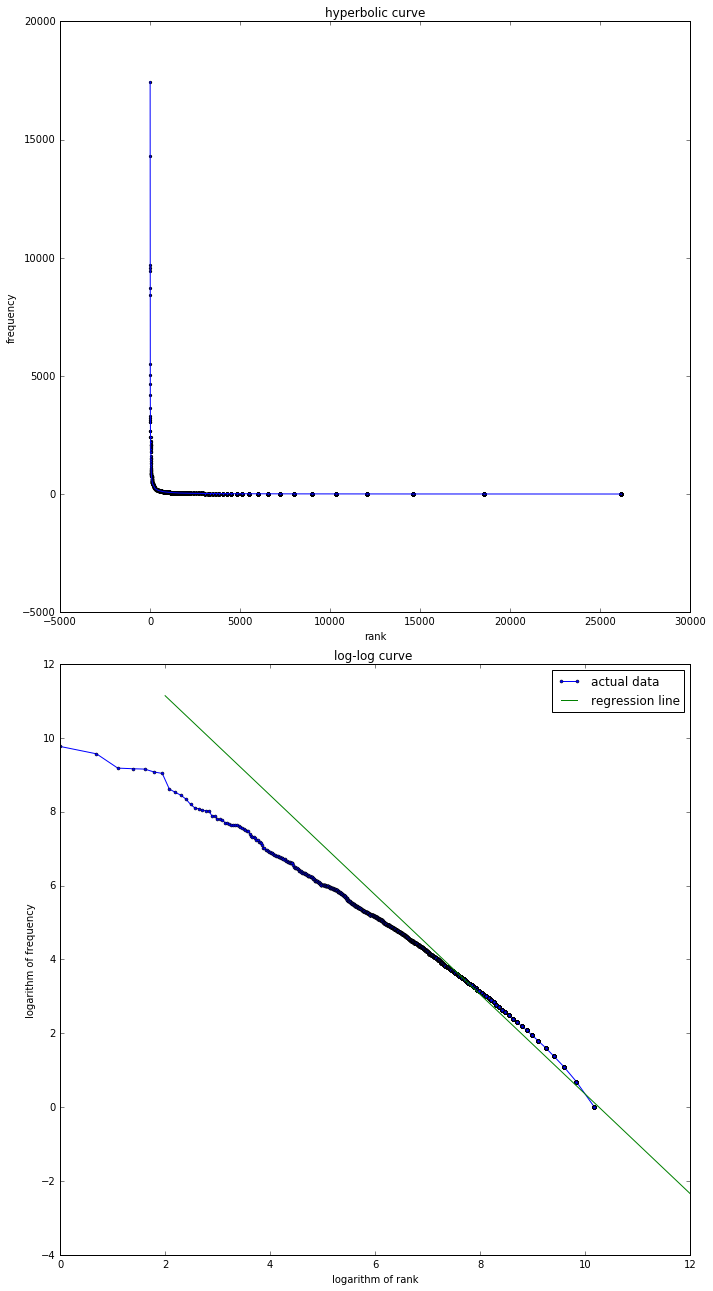

In [27]:
fig, ax = plt.subplots(2,1, figsize = (10,18))

ax[0].plot(seg_rank_DF["rank"],seg_rank_DF["counts"])
ax[0].scatter(seg_rank_DF["rank"],seg_rank_DF["counts"], s = 5)
ax[0].set_title("hyperbolic curve")
ax[0].set_xlabel("rank")
ax[0].set_ylabel("frequency")

ax[1].plot(seg_rank_DF["log_rank"],seg_rank_DF["log_counts"], label = "actual data", marker ='o', ms = 3)
ax[1].set_title("log-log curve ")
ax[1].set_xlabel("logarithm of rank")
ax[1].set_ylabel("logarithm of frequency")
_x = np.array([2,12])
ax[1].plot(_x, _x*result.params["log_rank"] + result.params["Intercept"], label = "regression line")

ax[1].legend()
fig.tight_layout()

- 结论  
  - 极高频词、中高频词和低频词分化明显。极高频词,虽然数量很少,其频次与绝大多数词语的频次差距却极大。低频词则呈现出恰恰相反的状况,随着词级的增长,频次也急剧下降,到了占总词数绝大多数的低频词阶段,其函数曲线递减性已经远远不如其在极高频和高频区间内的递减趋势。这表明,齐夫曲线的分布特征主要集中在高频词和中频词上。

  - 而齐夫对数分布曲线则只在低频词出现些许抛物线似下落未出现很明显的分化。这是因为频次和词级的数据取自然对数以后,其取值区间相较频次和词级的取值区间就稳定得多,同时通过对齐夫对数散点分布拟合趋势线的斜度,就能判断其与齐夫第一定律基本吻合,而分析其测定系数$R^2$值为0.98,也能够判断回归效果很好。  

  - 因此，齐夫第一定律在《天龙八部》中高频词中具有较好的适用性。但是由于齐夫第一定律只揭示了高频词的分布规律,对于同频词的低频词来说,齐夫第一定律就不能完全涵盖其分布特征了,这就需要对齐夫第二定律进进行验证,以确定在低频词段词频分布是否符合齐夫定律。

#### 齐夫第二定律

由$\frac{I_n}{I_1}=\frac{2}{n(n+1)},(n = 2,3,4...)$，可得
$I_n =\frac{2I_1}{n(n+1)}$, $I_1$为出现频次为1的同频词次数，这里为已知，可由此预测《天龙八部》中各个频次的同频词个数，并以此来验证其是否符合齐夫第二定律。

In [28]:
#true numbers of words with same frequncy
I_n_true = seg_rank_DF.groupby("counts").size()

In [29]:
I_1 = I_n_true[1]

In [30]:
# ture word ranks
n_true = I_n_true.index

In [31]:
# max rank
n_max =n_true[-1]

In [32]:
# predicted numbers of word with same frequency
n = np.linspace(2,n_max,n_max-1)
I_n  = 2*I_1/(n*(n + 1))

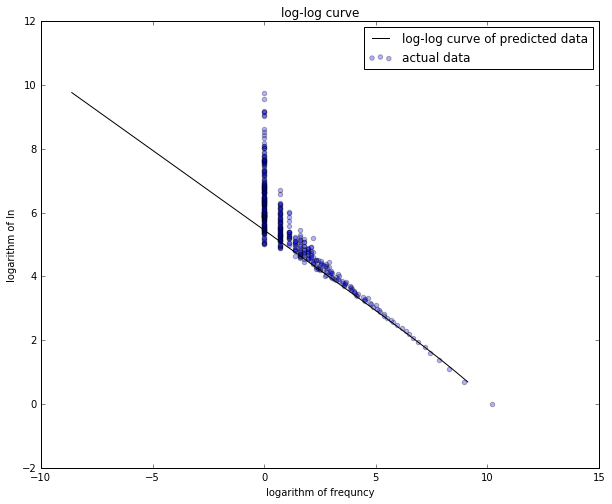

In [33]:
fig,ax = plt.subplots( figsize = (10,8))

ax.scatter(np.log(I_n_true), np.log(n_true), alpha = 0.3,label = "actual data")
ax.set_title("log-log curve")
ax.set_xlabel("logarithm of frequncy")
ax.set_ylabel("logarithm of In")

ax.plot(np.log(I_n), np.log(n), color = "k", label ="log-log curve of predicted data")
ax.legend()


- 结论  
 - 在低频词段， 预测数据和实际数据几乎吻合。这说明齐夫第二定律适用低频词阶段的分布,使得低频词同频词数对数呈现线性递降。但是齐夫第二定律并不适用于高频词的分布,高频词同频词数对数的分布呈现出一种阶梯状下降的趋势,与齐夫第二定律并不吻合。   

### 总结
由以上的分析可以初步证明《天龙八部》的词频分布在高频词和中频词阶段符合齐夫第一定律的分布,而低频词段的词频分布则与齐夫第二定律的分布规律更为吻合，所以可以判定其词频分布符合齐夫定律。
